## Thota Siddartha
## BL.EN.U4AIE21132

In [20]:
import librosa
import soundfile as sf
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

A1

Original Audio:


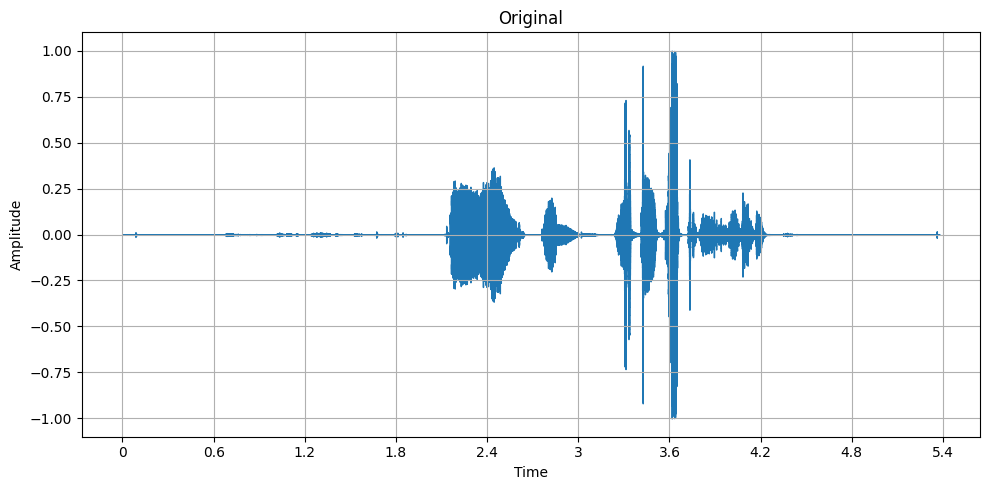

Trimmed Audio:


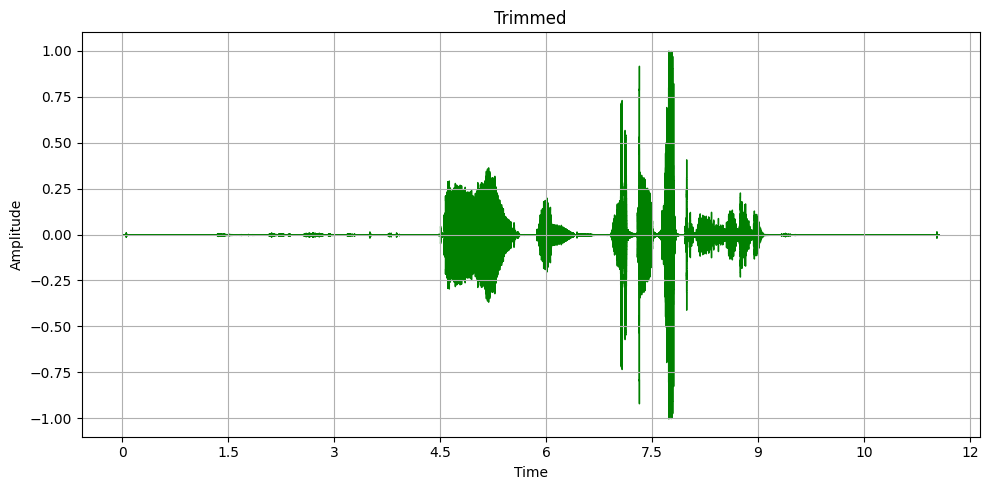

In [22]:
input_filename = 'Siddartha.wav'
output_filename = 'outputSiddartha.wav'
new_sr = 22050

original_audio, sr = librosa.load(input_filename, sr=None)
trimmed_audio, index = librosa.effects.trim(original_audio)
sf.write(output_filename, trimmed_audio, new_sr)
trimmed, sr1 = librosa.load(output_filename, sr=new_sr)

print("Original Audio:")
ipd.display(ipd.Audio(original_audio, rate=sr))

plt.figure(figsize=(10, 5))
librosa.display.waveshow(original_audio, sr=sr)
plt.title('Original')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Trimmed Audio:")
ipd.display(ipd.Audio(trimmed_audio, rate=sr))

plt.figure(figsize=(10, 5))
librosa.display.waveshow(trimmed, sr=sr1, color='green')
plt.title('Trimmed')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()



Splitting with top_db=1


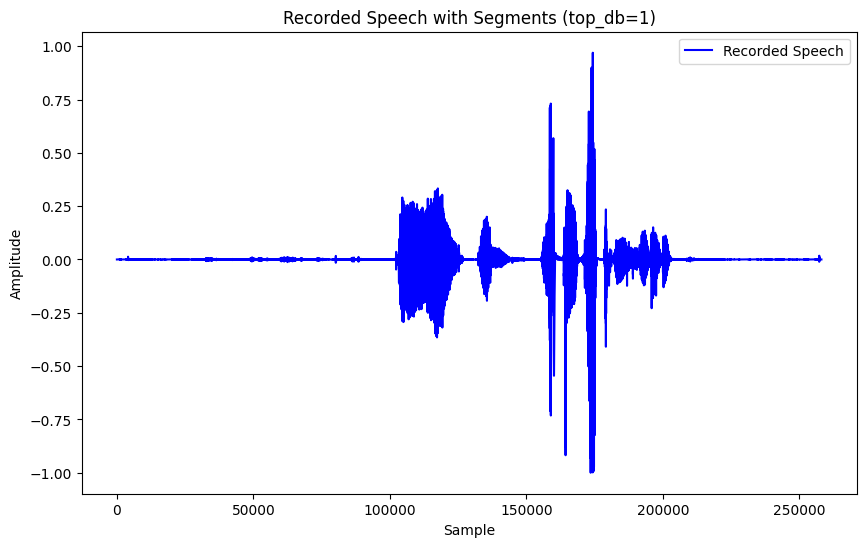

Splitting with top_db=10


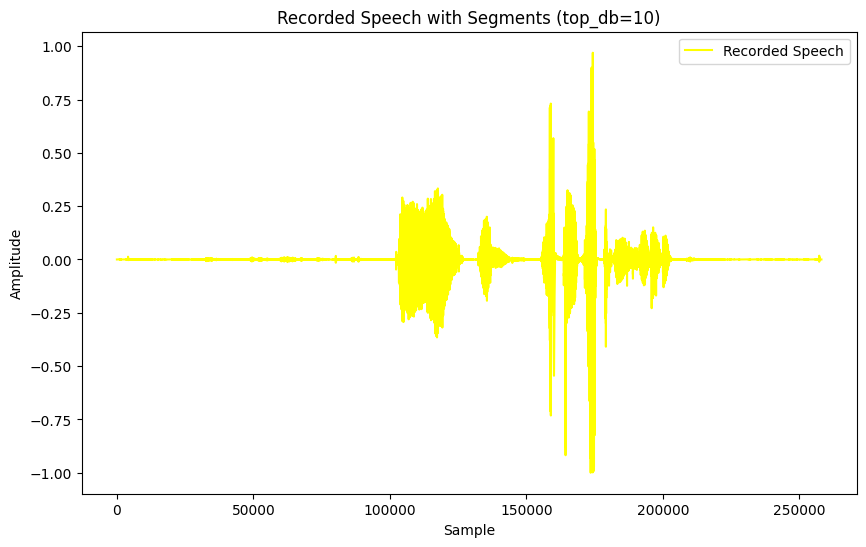

Splitting with top_db=20


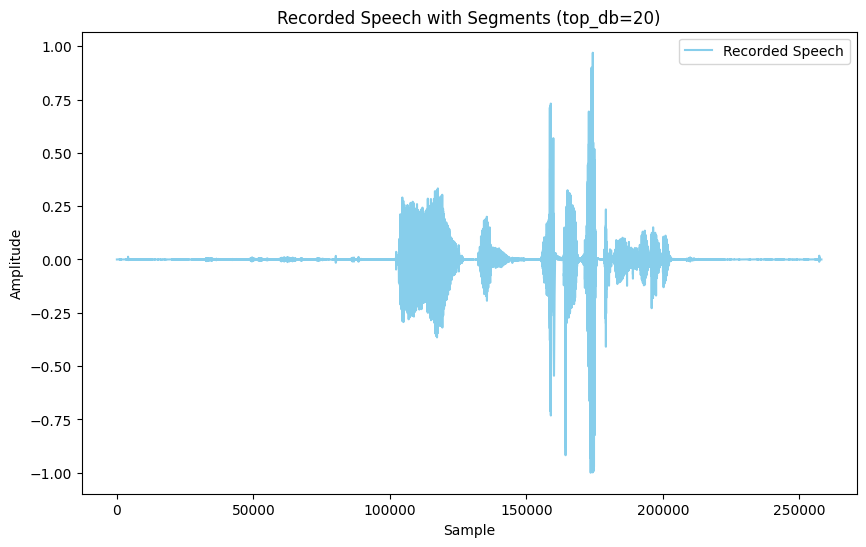

Splitting with top_db=40


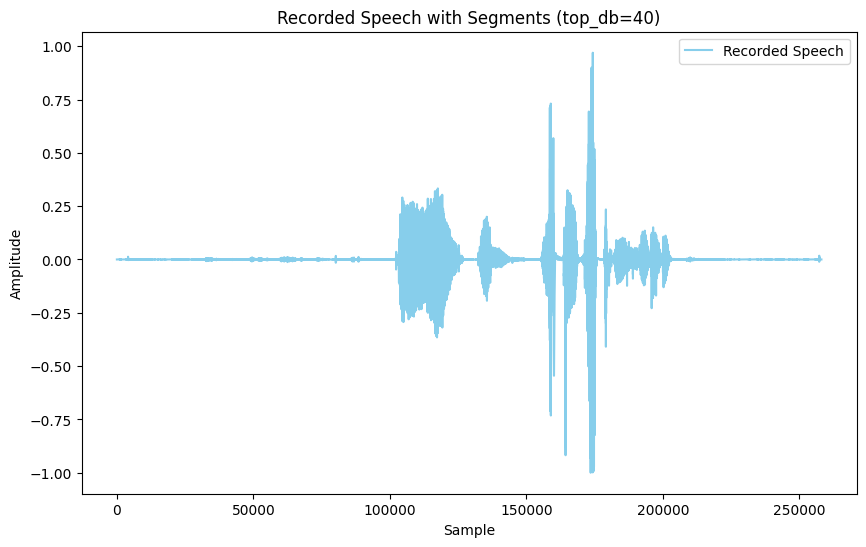

Listening to segments with top_db=1:


Listening to segments with top_db=10:


Listening to segments with top_db=20:


Listening to segments with top_db=40:


In [27]:

import librosa
import soundfile as sf
import IPython.display as ipd
import random
input_filename = 'Siddartha.wav'

recorded_speech, sr = librosa.load(input_filename, sr=None)

def split_and_save(top_db):
    segments = librosa.effects.split(recorded_speech, top_db=top_db)
    c = ['green', 'yellow', 'skyblue', 'blue']
    plt.figure(figsize=(10, 6))
    plt.plot(recorded_speech, color=random.choice(c), label='Recorded Speech')

    for i, segment in enumerate(segments):
        start, end = segment
        segment_audio = recorded_speech[start:end]
        sf.write(f'segment_{i}.wav', segment_audio, sr)

    plt.title(f"Recorded Speech with Segments (top_db={top_db})")
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

# Change top_db values if desired
top_db_values = [1, 10, 20, 40]

for top_db in top_db_values:
    print(f"Splitting with top_db={top_db}")
    split_and_save(top_db)

# Listen to the generated signals
for i in range(len(top_db_values)):
    print(f"Listening to segments with top_db={top_db_values[i]}:")
    for j in range(len(librosa.effects.split(recorded_speech, top_db=top_db_values[i]))):
        ipd.display(ipd.Audio(f'segment_{j}.wav'))


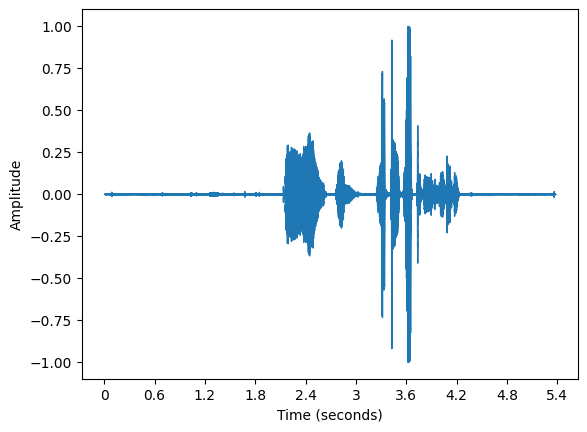

(1025, 253)


80.0

In [12]:
signal, sr = librosa.load("Siddartha.wav", sr=None)
from librosa import display
import matplotlib.pyplot as plt 
plt.figure()
librosa.display.waveshow(y=signal, sr=sr) 
plt.xlabel("Time (seconds)") 
plt.ylabel("Amplitude") 
plt.show()

n_fft = 2048
S= librosa.stft(signal, n_fft=n_fft, hop_length=n_fft//2)
print(S.shape)
D = librosa.amplitude_to_db(np.abs(S), ref=np.max) 
np.max(abs(D))

In [13]:
no_mute = librosa.effects.split(signal)
no_mute

array([[  3072,   5632],
       [  7168,   9728],
       [ 22016,  23552],
       [ 31744,  77824],
       [ 78848,  92160],
       [ 95232,  95744],
       [ 96256,  99328],
       [100864, 130560],
       [131584, 218112],
       [256512, 258048]])

In [14]:
def displayTime(startFrame, endFrame):    
    print(' start time: ' + str(startFrame/sr) + ', end time: ' + str(endFrame/sr))
for i in no_mute:
    displayTime(i[0],i[1])

 start time: 0.064, end time: 0.11733333333333333
 start time: 0.14933333333333335, end time: 0.20266666666666666
 start time: 0.45866666666666667, end time: 0.49066666666666664
 start time: 0.6613333333333333, end time: 1.6213333333333333
 start time: 1.6426666666666667, end time: 1.92
 start time: 1.984, end time: 1.9946666666666666
 start time: 2.005333333333333, end time: 2.0693333333333332
 start time: 2.1013333333333333, end time: 2.72
 start time: 2.7413333333333334, end time: 4.544
 start time: 5.344, end time: 5.376


 start time: 0.064, end time: 0.11733333333333333
 start time: 0.14933333333333335, end time: 0.20266666666666666
 start time: 0.45866666666666667, end time: 0.49066666666666664
 start time: 0.6613333333333333, end time: 1.6213333333333333
 start time: 1.6426666666666667, end time: 1.92
 start time: 1.984, end time: 1.9946666666666666
 start time: 2.005333333333333, end time: 2.0693333333333332
 start time: 2.1013333333333333, end time: 2.72
 start time: 2.7413333333333334, end time: 4.544
 start time: 5.344, end time: 5.376


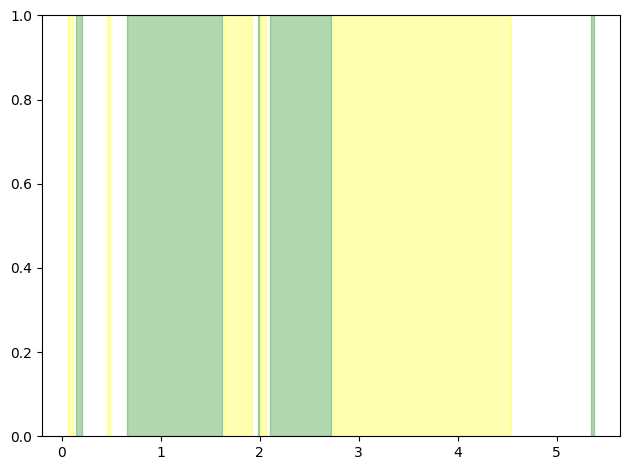

In [18]:
for i, (start, end) in enumerate(no_mute):
    displayTime(start, end)
    if i % 2 == 0:
        plt.axvspan(start/sr, end/sr, color='yellow', alpha=0.3)  # Plot silence segments in blue
    else:
        plt.axvspan(start/sr, end/sr, color='green', alpha=0.3)  # Plot non-silence segments in orange

plt.tight_layout()
plt.show()

C:\Users\THOTA SIDDARTHA\AppData\Local\Temp\ipykernel_13480\1264157454.py:4: RuntimeWarning: divide by zero encountered in log10
  signal_db = 20 * np.log10(np.abs(signal) / max_amplitude)


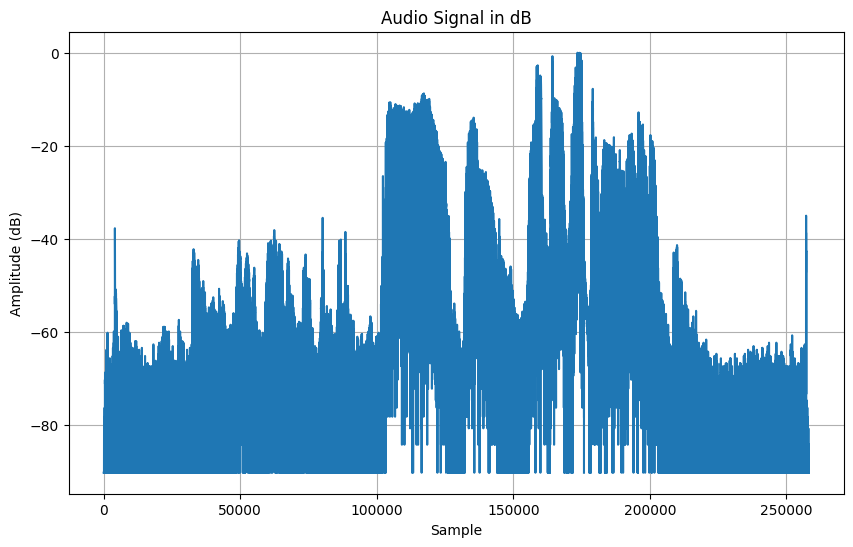

In [19]:
max_amplitude = np.max(np.abs(signal))

# Convert amplitude to dB
signal_db = 20 * np.log10(np.abs(signal) / max_amplitude)

# Plot the dB representation of the signal
plt.figure(figsize=(10, 6))
plt.plot(signal_db)
plt.xlabel('Sample')
plt.ylabel('Amplitude (dB)')
plt.title('Audio Signal in dB')
plt.grid(True)
plt.show()